In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Loading the dataset 

In [149]:
cols = ['Neighborhood','Exterior1st','Exterior2nd','SalePrice']
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [150]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [151]:
data[cols]

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,CmentBd,266500
1458,NAmes,MetalSd,MetalSd,142125


In [173]:
df = data[cols]
df.head(10)

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
5,Mitchel,VinylSd,VinylSd,143000
6,Somerst,VinylSd,VinylSd,307000
7,NWAmes,HdBoard,HdBoard,200000
8,OldTown,BrkFace,Wd Shng,129900
9,BrkSide,MetalSd,MetalSd,118000


### We will work with the three columns given

In [153]:
feature_cols = ['Neighborhood','Exterior1st','Exterior2nd']

In [154]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [155]:
df['Neighborhood'].nunique()

25

In [156]:
for col in feature_cols:
    print('{} : {}'.format(col,df[col].nunique()))

Neighborhood : 25
Exterior1st : 15
Exterior2nd : 16


In [157]:
df.shape

(1460, 4)

In [158]:
df.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
SalePrice       0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   Exterior1st   1460 non-null   object
 2   Exterior2nd   1460 non-null   object
 3   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [174]:
totalHouses = df.shape[0]
totalHouses

1460

## Ploting the bar graph with "% of houses" VS "Respective Category"

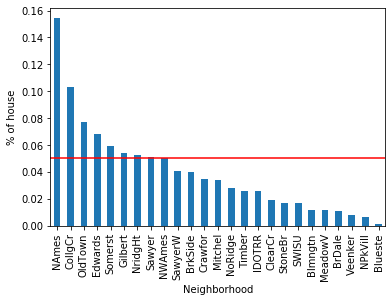

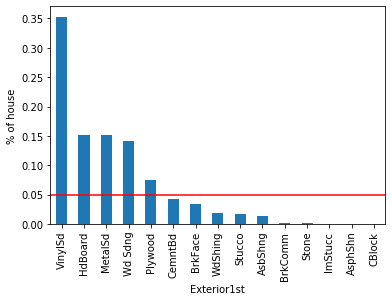

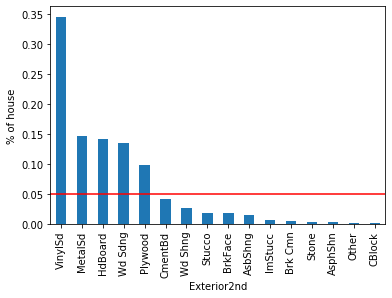

In [161]:
for col in feature_cols:
    temp = (df[col].value_counts()/totalHouses)
    temp.plot.bar()
    plt.axhline(y = 0.05, color = 'red')
    plt.xlabel(col)
    plt.ylabel('% of house')
    plt.show()

## How is SalePrice related to there categories

In [162]:
def get_mean_salesPrice_per_categories(data,cat):
    temp = (df[cat].value_counts()/totalHouses)
    temp = temp.reset_index()
    temp.columns = [cat,'% of houses']
    
    ## Groupby with respective categories with the salePrices mean of that partical catergory and also setting the index
    meanPrice = data.groupby([cat])['SalePrice'].mean().reset_index()
    
    temp = temp.merge(meanPrice, on = cat, how = 'left')
    
    return temp
    

In [163]:
get_mean_salesPrice_per_categories(df,'Neighborhood')

,Neighborhood,% of houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


In [164]:
get_mean_salesPrice_per_categories(df,'Exterior1st')

,Exterior1st,% of houses,SalePrice
0,VinylSd,0.352740,213732.900971
1,HdBoard,0.152055,163077.450450
2,MetalSd,0.150685,149422.177273
3,Wd Sdng,0.141096,149841.645631
4,Plywood,0.073973,175942.379630
5,CemntBd,0.041781,231690.655738
6,BrkFace,0.034247,194573.000000
7,WdShing,0.017808,150655.076923
8,Stucco,0.017123,162990.000000
9,AsbShng,0.013699,107385.550000


In [165]:
get_mean_salesPrice_per_categories(df,'Exterior2nd')

,Exterior2nd,% of houses,SalePrice
0,VinylSd,0.345205,214432.460317
1,MetalSd,0.146575,149803.172897
2,HdBoard,0.141781,167661.565217
3,Wd Sdng,0.134932,148386.065990
4,Plywood,0.097260,168112.387324
5,CmentBd,0.041096,230093.833333
6,Wd Shng,0.026027,161328.947368
7,Stucco,0.017808,155905.153846
8,BrkFace,0.017123,195818.000000
9,AsbShng,0.013699,114060.550000


## Anlysis for Rarely Occuring labels

In [166]:
def plot_cat(data,cat):
    
    fig,ax1 = plt.subplots()
    plt.xticks(data.index,data[cat],rotation = 90)
    
    ax2 = ax1.twinx()
    ax1.bar(data.index,data['% of houses'],color = 'lightgrey')
    ax2.plot(data.index,data['SalePrice'],color = 'green',label = 'House Price')
    ax1.axhline(y = 0.05,color = 'red')
    ax1.set_ylabel('% of houses')
    ax1.set_xlabel(cat)
    
    ax2.set_ylabel('Mean of House Price per Category')
    
    plt.show()
    

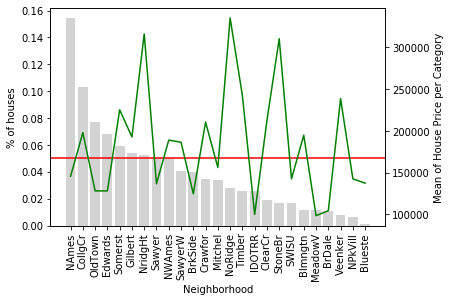

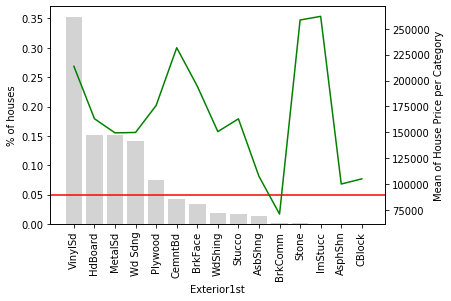

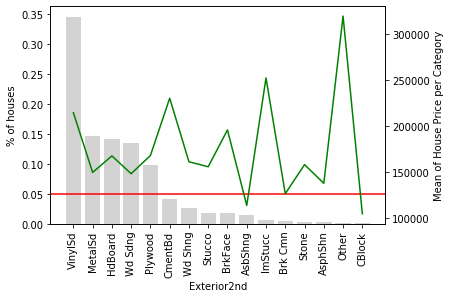

In [167]:
for col in feature_cols:
    temp = get_mean_salesPrice_per_categories(df,col)
    plot_cat(temp,col)

## Grouping of Rare Labels

In [168]:
def rare_labels_grouping(data,cat):
    temp = (data[cat].value_counts()/totalHouses)
    
    grouping_dict = {
        a : 'rare' if a not in temp[temp >= 0.05].index else a for a in temp.index
    }
    
    t = data[cat].map(grouping_dict)
    
    return t

In [169]:
for col in feature_cols:
    df[col] = rare_labels_grouping(df,col)
df.head(20)

/home/arijit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,rare,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,rare,Wd Sdng,rare,140000
4,rare,VinylSd,VinylSd,250000
5,rare,VinylSd,VinylSd,143000
6,Somerst,VinylSd,VinylSd,307000
7,NWAmes,HdBoard,HdBoard,200000
8,OldTown,rare,rare,129900
9,rare,MetalSd,MetalSd,118000


In [170]:
temp = get_mean_salesPrice_per_categories(df,'Neighborhood')
temp

,Neighborhood,% of houses,SalePrice
0,rare,0.330822,189293.376812
1,NAmes,0.154110,145847.080000
2,CollgCr,0.102740,197965.773333
3,OldTown,0.077397,128225.300885
4,Edwards,0.068493,128219.700000
5,Somerst,0.058904,225379.837209
6,Gilbert,0.054110,192854.506329
7,NridgHt,0.052740,316270.623377
8,Sawyer,0.050685,136793.135135
9,NWAmes,0.050000,189050.068493


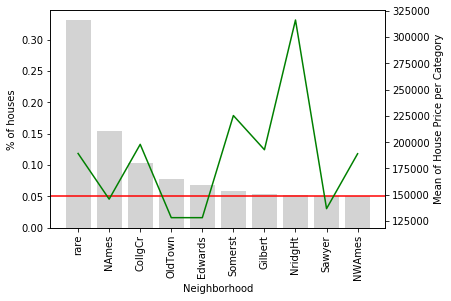

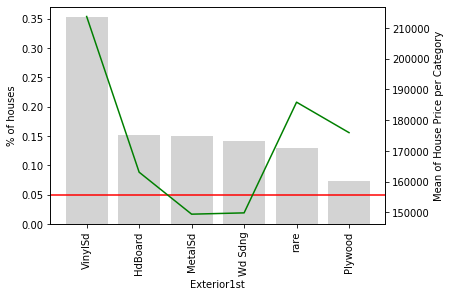

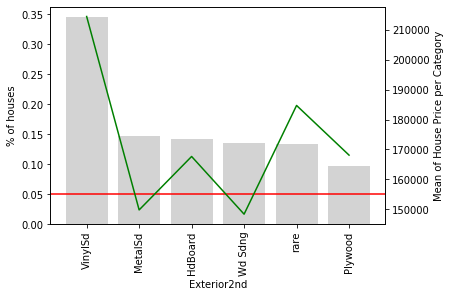

In [171]:
for col in feature_cols:
    temp = get_mean_salesPrice_per_categories(df,col)
    plot_cat(temp,col)